In [1]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orgienhaus,2000
1,Invasion of the Reptoids,2011
2,All the President's Men,1976
3,Det glada kalaset,1946
4,Into the Wake,2012


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [8]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  14
The Outsider            11
The Three Musketeers    11
Othello                 11
Maya                    11
Anna                    10
Kismet                  10
Honeymoon               10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [9]:
t = titles[titles.year // 10 == 193]
t.year.value_counts().head(3)

1937    1187
1936    1130
1938    1125
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

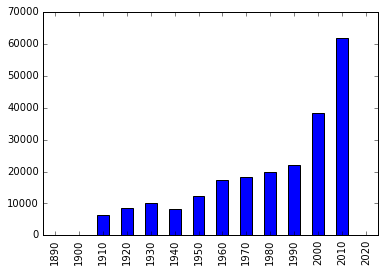

In [10]:
(titles.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

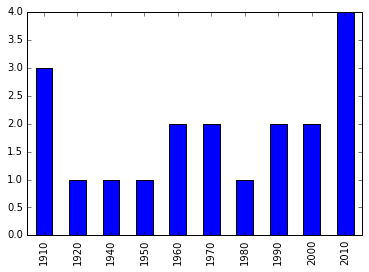

In [11]:
t = titles[titles.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

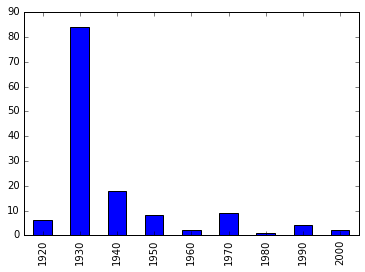

In [13]:
c = cast[cast.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

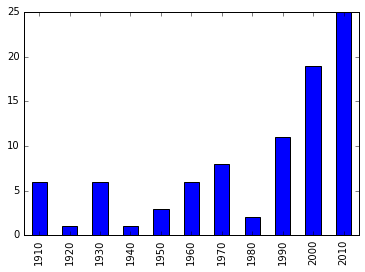

In [14]:
c = cast[cast.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [15]:
cast.character.value_counts().head(11)

Himself        18981
Dancer         11578
Extra           9941
Reporter        7877
Doctor          7185
Student         6719
Policeman       6687
Party Guest     6459
Nurse           6394
Bartender       6358
Minor Role      6113
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [19]:
c = cast[cast.character == 'Herself']
c.name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Caroline Rhea          5
Hillary Clinton        5
Jane Fonda             5
Kareena Kapoor         5
Marilyn Monroe         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [20]:
c = cast[cast.character == 'Himself']
c.name.value_counts().head(10)

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           22
Winston Churchill        21
Bill Clinton             20
Benito Mussolini         20
Franklin D. Roosevelt    20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [22]:
c = cast[cast.year == 1945]
c.name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     30
Harold Miller       29
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Franklyn Farnum     25
Larry Steers        25
Charles Sullivan    24
Herman Hack         24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [23]:
c = cast[cast.year == 1985]
c.name.value_counts().head(10)

Mammootty           21
Sukumari            19
Shakti Kapoor       19
Mohanlal            15
Lou Scheimer        15
Aruna Irani         14
Raj Babbar          14
Deven Verma         13
Rajesh Khanna       13
Satyendra Kapoor    12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

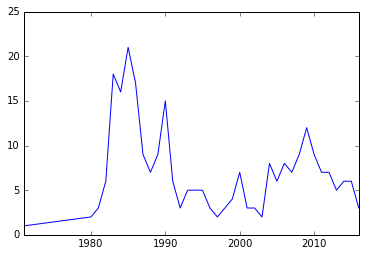

In [14]:
c = cast[cast.name == "Mammootty"]
c.year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [11]:
c = cast[cast.character.str.startswith("Patron in")]
c = c.character.value_counts()
c.head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in cabaret                3
Patron in Restaurant             3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [13]:
c = cast[cast.character.str.startswith("Science")]
c = c.character.value_counts()
c.head(10)

Science Teacher         56
Science Fair Student     9
Science Student          9
Science Club Member      5
Science Reporter         5
Science Promo Cadet      5
Science Fair Judge       5
Science Kid              4
Science Fair Kid         3
Science Officer          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

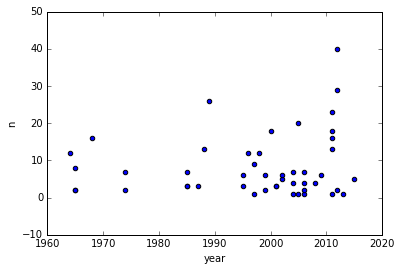

In [20]:
c = cast[(cast.name == 'Judi Dench') & (cast.n.notnull())].sort_values(by='year')
c.plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

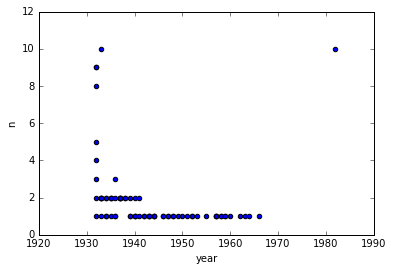

In [21]:
c = cast[(cast.name == 'Cary Grant') & (cast.n.notnull())].sort_values(by='year')
c.plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

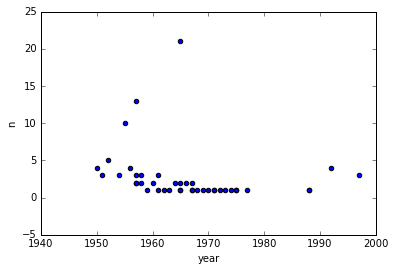

In [23]:
c = cast[(cast.name == 'Sidney Poitier') & (cast.n.notnull())].sort_values(by='year')
c.plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [27]:
c = cast[(cast.year // 10 == 195) & (cast.n == 1)]
c.type.value_counts()

actor      6494
actress    2881
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [28]:
c = cast[(cast.year // 10 == 195) & (cast.n == 2)]
c.type.value_counts()

actress    4481
actor      4462
Name: type, dtype: int64